In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
import pandas as pd
from gmail_assistant_llm.util import *

def read_json(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    return data

job_data = read_json(get_path(os.getenv('JOB_LIST_FINAL')))
print("Total companies: ", len(job_data))

Total companies:  5


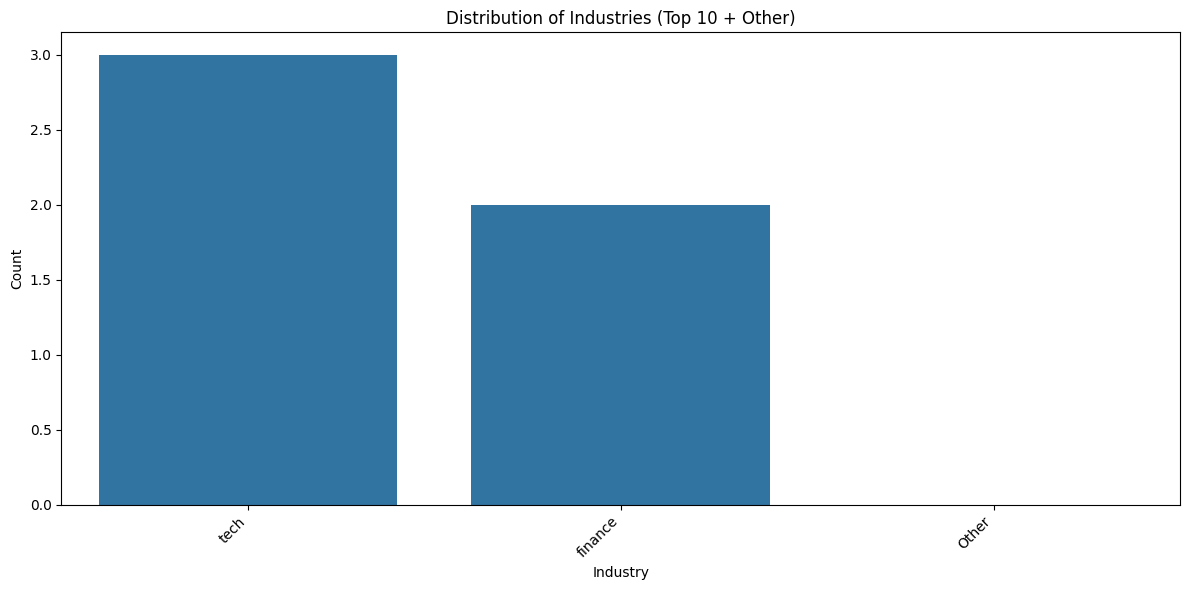

In [2]:
industry = []
for job in job_data:
    industry.append(job['industry'])



# Count the frequencies of each industry
industry_counts = Counter(industry)

# Create a DataFrame from the counts
df = pd.DataFrame.from_dict(industry_counts, orient='index', columns=['count']).reset_index()
df = df.rename(columns={'index': 'industry'})
df = df.sort_values('count', ascending=False)

# Get the top 10 industries
top_10 = df.nlargest(10, 'count')

# Sum the counts of the remaining industries
other_count = df.iloc[10:]['count'].sum()

# Add the "Other" category
other = pd.DataFrame({'industry': ['Other'], 'count': [other_count]})

# Combine top 10 and Other
df_plot = pd.concat([top_10, other])

# Create the bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='industry', y='count', data=df_plot)
plt.title('Distribution of Industries (Top 10 + Other)')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [4]:
# print certain industries
for job in job_data:
    if job['industry'] == 'tech':
        print(20*'-')
        print(job['name'])
        print(job['company_url'])


--------------------
Reddit, Inc.
https://www.reddit.com
--------------------
Swooped
https://swooped.co
--------------------
Cloudflare
https://www.cloudflare.com


In [5]:
# Create DataFrame
df = pd.DataFrame(job_data)

# Save to Excel
excel_file = 'companies_data.xlsx'
df.to_excel(excel_file, index=False)
